In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import os
matplotlib.rcParams.update({'font.size': 22})
%matplotlib inline

In [2]:
%%html
<h1> Plotting the Temperature at different Times </h1>
<img src="plots/all/0.0056_10_30_30_0.0002_0.txt.png">

In [3]:
fnames = sorted(os.listdir("data/snapshots/all/"))
for fname in fnames:
    name_tmp = fname.split('_')
    
    zeitpunkt = float(name_tmp[0])
    dt=float(name_tmp[4])
    Nx=int(name_tmp[2])
    Pe = float(name_tmp[1])
    infile = open("data/snapshots/all/{}".format(fname), "r")
    data = np.loadtxt(infile)
    infile.close()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("t= {}, Pe= {}, dt= {}, Nx=Ny= {}".format(zeitpunkt,Pe, dt, Nx))
    ax.set_xlabel("x")
    ax.set_ylabel('y', rotation=0)
    c = ax.imshow(data, interpolation=None, extent=[0,1, 0,1])
    clb=plt.colorbar(mappable=c,ax=ax, fraction=0.0455)
    clb.set_label(label="T",rotation=0)
    fig.savefig("plots/all/{}.png".format(fname))
    plt.close('all')

In [4]:
%%html
<h1>Convergence and Error by different Gridsizes</h1>
<body> <p>A criterion for divergence is chosen as the root sum of squared errors(rSSE) of the temperature field compared to the stationary solution T* </p> 
<p> The convergence of the temperature field is plotted as a function of time for gridsizes ranging from 5 to 35.</p>
<p>Next the rSSE at the converged value is plotted as a function of gridsize, to allow further comparison.</p>
</body>

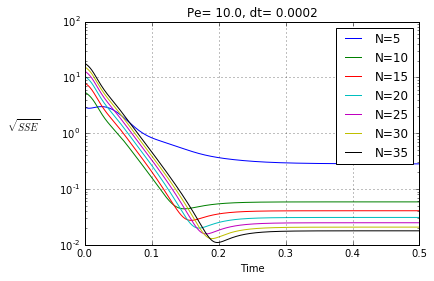

In [5]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.grid(True)
tarr=[]
for fname in sorted(os.listdir('/home/marszal/Projects/Num_Str_final/FTCS/data/SSE/')):
    data = np.loadtxt(open('/home/marszal/Projects/Num_Str_final/FTCS/data/SSE/{}'.format(fname), 'r'))
    name_tmp=fname.split('x')
    dt=0.0002
    Nx=int(name_tmp[0])
    Pe = 10.
    if(Nx<=35):
        tarr.append(data[-1])

        ax.plot(data[:,0],data[:,1], label="N={}".format(Nx))
        ax.set_title("Pe= {}, dt= {}".format(Pe, dt))
ax.set_xlabel("Time")
ax.set_xlim(0,0.5)
ax.set_ylabel("$\sqrt{SSE}$\t\t\t", rotation=0)
ax.set_yscale('log')
ax.legend()
plt.savefig("/home/marszal/Projects/Num_Str_final/BTCS/plots/sse_over_time.pdf")


tarr=np.array(tarr)


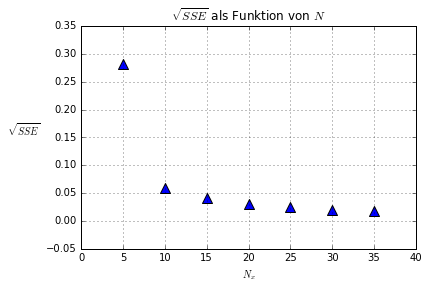

In [6]:
fig = plt.figure()
x=np.arange(5,36,5)
ax = fig.add_subplot(111)
ax.scatter(x,tarr[:,1], marker='^', s=100, )
ax.set_ylabel('$\sqrt{SSE}$\t\t', rotation=0)
ax.set_xlabel('$N_x$')
ax.grid(True)
ax.set_title("$\sqrt{SSE}$ als Funktion von $N$")
plt.savefig("/home/marszal/Projects/Num_Str_final/BTCS/plots/SSE_at_end.pdf")

In [7]:
%%html
<h1>Estimating the largest stable timestep</h1>
<body>
<p>First the theoretical expected stability bounds are calculated and shown. These give an estimate for the range in which the search has to be done.</p>
<p>As a criterion for divergence the average modulus of the gridcells is chosen.</p>
<p>The divergence parameter is shown as a function of time, for various Pe-Numbers and a constant gridsize of 30.</p>
</body>


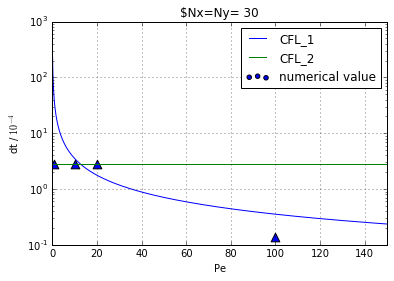

In [8]:
#CFL Kriterium
def CFL_1(N,Pe):
    return 1./N / 3/np.pi /Pe
def CFL_2(N):
    return 1./(N**2.)/4.
CFL_1=np.vectorize(CFL_1)
CFL_2=np.vectorize(CFL_2)
Pe = np.linspace(0,150,1000)
N = 30.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(Pe[1:], 10**4*CFL_1(N,Pe[1:]), label="CFL_1")
ax.plot(Pe[1:], 10**4*np.ones_like(Pe[1:])*CFL_2(N), label="CFL_2")
ax.scatter(0.1, 2.8, label="numerical value")
ax.scatter(1, 2.8,marker='^',s=75.)
ax.scatter(10.,2.81,marker='^',s=75.)
ax.scatter(20,2.81,marker='^',s=75.)
ax.scatter(100,0.14,marker='^',s=75.)
#ax.set_ylim(10**4*0.00022,10**4*0.0003)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0,150)
ax.set_xlabel('Pe')
ax.set_ylabel('dt / $10^{-4}$', rotation=90)
ax.set_title("$Nx=Ny= 30")
plt.legend(loc=1)
plt.savefig("/home/marszal/Projects/Num_Str_final/FTCS/plots/A5/theoretical.pdf")


In [9]:
def plot_stability(dir_name, ax, Pe):
    folders = sorted(os.listdir(dir_name))
    
    
    for folder in folders:
        SoS = []
        dt=0
        snap_shots = sorted(os.listdir(dir_name+'/'+folder))
        for fname in snap_shots:
            name_tmp = fname.split('_')    
            zeitpunkt = float(name_tmp[0])
            Pe_local = float(name_tmp[1])
            dt = float(name_tmp[4])       
            infile = open(dir_name+'/'+folder+'/'+fname)
            data = np.loadtxt(infile)
            data = np.sqrt(data*data)
            SoS_i = data.mean()
            SoS.append((zeitpunkt,SoS_i))
        SoS = np.array(SoS)
        if(Pe>90):
            ax.plot(SoS[:-2,0], SoS[:-2,1], label="dt= {}".format(dt))

        else:  
            ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))
    


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python2.7/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


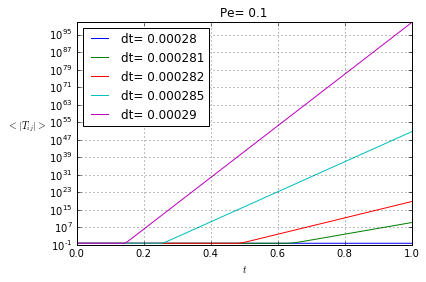

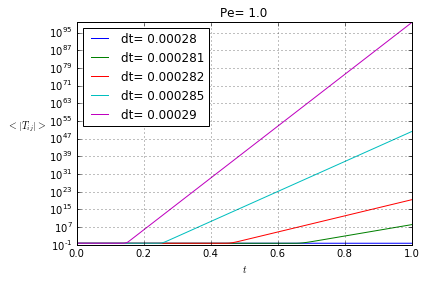

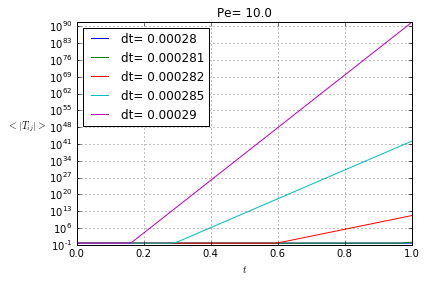

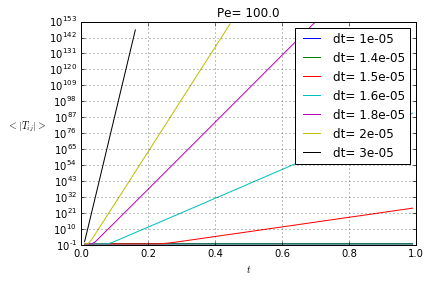

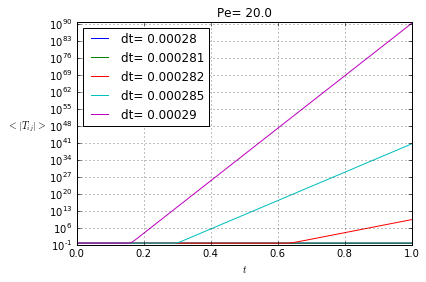

In [10]:
root_name="data/snapshots/A5/"
folder_names = sorted(os.listdir(root_name))
for folder in folder_names:
    Pe = folder.split("Pe")[1]
    if Pe[0]=='0':
        Pe = float(Pe)/10.
    else:
        Pe=float(Pe)
    fig=plt.figure()
    ax = fig.add_subplot(111)
  
    plot_stability(root_name+folder+"/", ax, Pe)
    
    ax.set_title("Pe= {}".format(Pe))

    ax.set_ylabel("$< |T_{ij}|>$\t\t", rotation=0)
    ax.set_xlabel('$t$')
    ax.grid(True)
    ax.set_xlim(0,1)
    #ax.set_ylim(-0,1000)
    ax.set_yscale('log')
    if(Pe>90):
        plt.legend(loc=1)
    else:
        plt.legend(loc=2)
    plt.savefig("/home/marszal/Projects/Num_Str_final/FTCS/plots/A5/Divergence_Pe{}.pdf".format(Pe))


[  1.00000000e+000   3.54728775e+100]


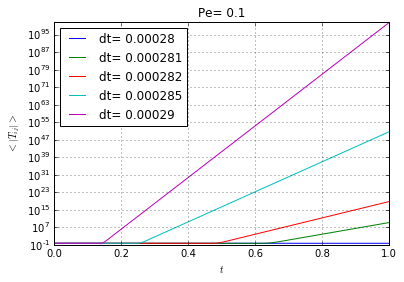

In [11]:
#Estimate for divergence
fig = plt.figure()
ax = fig.add_subplot(111)

dir_name = "data/snapshots/A5/Pe01/dt00028/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = "data/snapshots/A5/Pe01/dt000281/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = "data/snapshots/A5/Pe01/dt000282/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = "data/snapshots/A5/Pe01/dt000285/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = "data/snapshots/A5/Pe01/dt00029/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

ax.set_title("Pe= {}".format(Pe))

ax.set_ylabel("$< |T_{ij}|>$")
ax.set_xlabel('$t$')
ax.grid(True)
ax.set_xlim(0,1)
#ax.set_ylim(-0,1000)
ax.set_yscale('log')
plt.legend(loc=2)
print SoS[-1]

[  1.00000000e+00   3.39025696e+99]


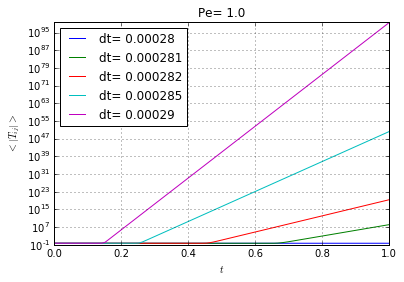

In [12]:
#Estimate for divergence
fig = plt.figure()
ax = fig.add_subplot(111)
dir_name_ = "data/snapshots/A5/Pe1/"


dir_name = dir_name_+"dt00028/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_+"dt000281/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_+"dt000282/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_+"dt000285/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_+"dt00029/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))
ax.set_title("Pe= {}".format(Pe))

ax.set_ylabel("$< |T_{ij}|>$")
ax.set_xlabel('$t$')
ax.grid(True)
ax.set_xlim(0,1)
#ax.set_ylim(-0,1000)
ax.set_yscale('log')
plt.legend(loc=2)
print SoS[-1]

[  1.00000000e+00   4.38999002e+91]


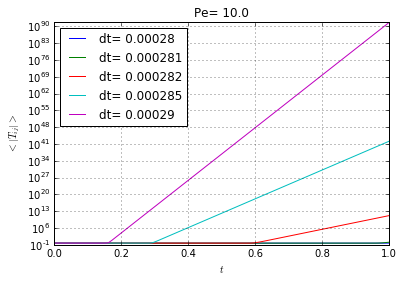

In [13]:
#Estimate for divergence
fig = plt.figure()
ax = fig.add_subplot(111)
dir_name_0 = "data/snapshots/A5/Pe10/"


dir_name = dir_name_0+"dt00028/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)
ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt000281/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt000282/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt000285/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt00029/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))
ax.set_title("Pe= {}".format(Pe))

ax.set_ylabel("$< |T_{ij}|>$")
ax.set_xlabel('$t$')
ax.grid(True)
ax.set_xlim(0,1)
#ax.set_ylim(-0,1000)
ax.set_yscale('log')
plt.legend(loc=2)
print SoS[-1]

[  1.00000000e+00   1.84058544e+90]


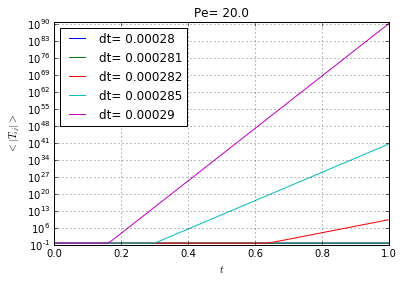

In [14]:
#Estimate for divergence
fig = plt.figure()
ax = fig.add_subplot(111)
dir_name_0 = "data/snapshots/A5/Pe20/"


dir_name = dir_name_0+"dt00028/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)
ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt000281/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt000282/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt000285/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt00029/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))
ax.set_title("Pe= {}".format(Pe))

ax.set_ylabel("$<|T_{ij}|>$")
ax.set_xlabel('$t$')
ax.grid(True)
ax.set_xlim(0,1)
#ax.set_ylim(-0,1000)
ax.set_yscale('log')
plt.legend(loc=2)
print SoS[-1]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:67: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:83: RuntimeWarning: overflow encountered in multiply


[  2.00000000e-05   5.00249365e-01]


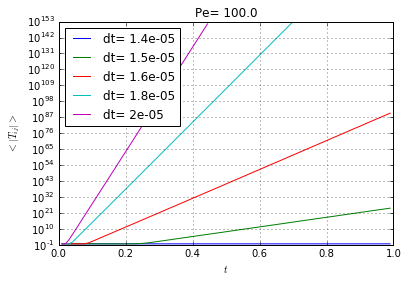

In [15]:
#Estimate for divergence
fig = plt.figure()
ax = fig.add_subplot(111)
dir_name_0 = "data/snapshots/A5/Pe100/"

dir_name = dir_name_0+"dt000014/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:-2,0], SoS[:-2,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt000015/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:-2,0], SoS[:-2,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt000016/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:-2,0], SoS[:-2,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt000018/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)
ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

dir_name = dir_name_0+"dt00002/"
snap_shots = sorted(os.listdir(dir_name))
SoS = []
for fname in snap_shots:
    name_tmp = fname.split('_')    
    zeitpunkt = float(name_tmp[0])
    Pe = float(name_tmp[1])
    dt = float(name_tmp[4])
    infile = open(dir_name+fname)
    data = np.loadtxt(infile)
    data = np.sqrt(data*data)
    SoS_i = data.mean()
    SoS.append((zeitpunkt,SoS_i))
SoS = np.array(SoS)

ax.plot(SoS[:,0], SoS[:,1], label="dt= {}".format(dt))

ax.set_title("Pe= {}".format(Pe))

ax.set_ylabel("$< |T_{ij}|>$")
ax.set_xlabel('$t$')
ax.grid(True)
ax.set_xlim(0,1)
#ax.set_ylim(-0,1000)
ax.set_yscale('log')
plt.legend(loc=2)
print SoS[-1]

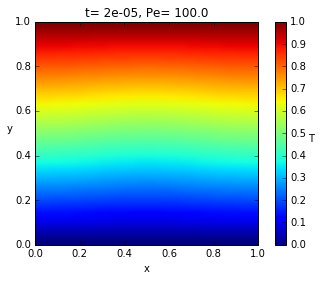

In [16]:

fname = snap_shots[-1]
infile = open(dir_name+fname)
name_tmp = fname.split('_')    
zeitpunkt = float(name_tmp[0])
Pe = float(name_tmp[1])
data = np.loadtxt(infile)
infile.close()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("t= {}, Pe= {}".format(zeitpunkt,Pe))
ax.set_xlabel("x")
ax.set_ylabel('y', rotation=0)
c = ax.imshow(data, interpolation=None, extent=[0,1, 0,1])
clb=plt.colorbar(mappable=c,ax=ax, fraction=0.0455)
clb.set_label(label="T",rotation=0)

In [17]:
def T_ij(x,y):
    return np.cos(np.pi*x)*np.sin(np.pi*y)+y
def u_0(x,y):
    return  np.pi*np.sin(2*np.pi*x)*np.cos(np.pi*y),-2*np.pi*np.cos(2*np.pi*x)*np.sin(np.pi*y)

u_0v=np.vectorize(u_0)
Tt=np.vectorize(T_ij)
x = np.linspace(0,1,31)
y = x
X,Y=np.meshgrid(x,y)
T=Tt(X,Y)
u=u_0v(X,Y)
Pe=2.
sum1 = -Pe*np.pi*np.pi*np.sin(2.*np.pi*X)*np.cos(np.pi*Y)*np.sin(np.pi*X)*np.sin(np.pi*Y) ;
sum2 = -2.*Pe*np.pi*np.pi*np.cos(2*np.pi*X)*np.cos(np.pi*Y)*np.cos(np.pi*X)*np.sin(np.pi*Y);
sum3 = -2.*Pe*np.pi*np.cos(2.*np.pi*X)*np.sin(np.pi*Y);
sum4 = 2.*np.pi*np.pi*np.cos(np.pi*X)*np.sin(np.pi*Y);
Qij = sum1+sum2+sum3+sum4;

T_0 = Y

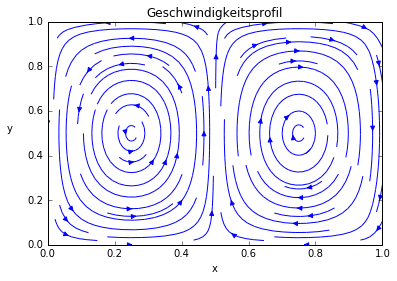

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.streamplot(X,Y, u[0],u[1])
ax.set_xlabel("x")
ax.set_ylabel('y        ', rotation=0)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_title("Geschwindigkeitsprofil")

In [19]:
from ipywidgets import widgets

In [20]:
def u_play(w):
    x = np.linspace(0,1,31)
    y = x
    X,Y=np.meshgrid(x,y)
    return u_0v(w*X,Y)
def u_play_plot(w):
    v = u_play(w)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.streamplot(X,Y, v[0],v[1])
    ax.set_xlabel("x")
    ax.set_ylabel('y        ', rotation=0)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_title("Geschwindigkeitsprofil")

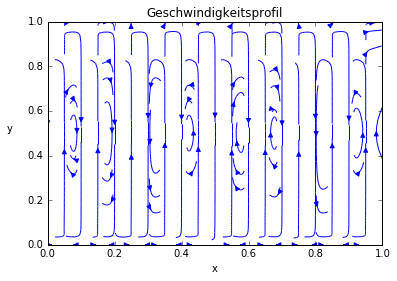

In [24]:
widgets.interact(u_play_plot,w=(0,10,0.1),__manual=True)